<a href="https://colab.research.google.com/github/afif-af/ml_spacialization/blob/main/supervisedWeek002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1_W2_Lab03

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from lab_utils_multi import  load_house_data, run_gradient_descent
# from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
# from lab_utils_common import dlc
np.set_printoptions(precision=2)
# plt.style.use('./deeplearning.mplstyle')

In [ ]:
# x_train=np.array([[952,2,1,65],[1244,3,2,64],[1947,3,2,17]])
# # load the dataset
X_train, y_train = load_house_data()
# y_train=[271.5,232,509.8]
x_features=['size(sqft)','bedrooms','floors','age']

NameError: name 'load_house_data' is not defined

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [ ]:
# _,_,hist=run_gradient_descent(x_train,y_train,10,alpha=9.9e-7)


In [ ]:
# plot_cost_i_w(x_train,y_train,hist)

In [ ]:
_,_,hist=run_gradient_descent(x_train,y_train,alpha=9e-7)

NameError: name 'run_gradient_descent' is not defined

In [ ]:
plot_cost_i_w(x_train,y_train,hist)

In [ ]:
_,_,hist=run_gradient_descent(x_train,y_train,alpha=1e-7)

NameError: name 'run_gradient_descent' is not defined

In [ ]:
plot_cost_i_w(x_train,y_train,hist)

NameError: name 'plot_cost_i_w' is not defined

In [ ]:
def zcore_normalize_features(x):
  mu=np.mean(x,axis=0)
  sigma=np.std(x,axis=0)
  x_norm=(x-mu)/sigma
  return (x_norm,mu,sigma)

In [ ]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fix,ax=plt.subplotss(1,3,figsize=(12,3))
ax[0].scatter(x_train[:,0],x_train[:,3])
ax[0].set_xlabel(x_features[0])
ax[0].set_ylabel(x_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0],X_mean[:,3])
ax[1].set_xlabel(x_features[0])
ax[1].set_ylabel(x_features[3])
ax[1].set_title("mean normalized")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0],X_norm[:,3])
ax[2].set_xlabel(x_features[0])
ax[2].set_ylabel(x_features[3])
ax[2].set_title("normalized")
ax[2].axis('equal')


plt.tight_layout(rect=[0,0.03,1,0.95])
fig.suptitle("distritution of features before ,during,after normalized")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplotss'

In [ ]:
x-norm,x_mu,x_sigma=zcore_normalize_features(x_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-34-fa42c8a98f8a>, line 1)

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()

fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

In [ ]:
w_norm,b_norm,hist=run_gradient_descent(x_norm,y_train,1000,1.0e-1,)

NameError: name 'run_gradient_descent' is not defined

In [ ]:
m=x_norm.shape[0]
yp=np.zeros(m)
for i in range(m):
  yp[i]=np.dot(x_norm[i],w_norm)+b_norm

fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label="target")
  ax[i].scatter(x_train[:,i],yp,color=dlc["dlorange"],label="predict")
ax[0].set_ylabel("Price");ax[0].legend();
fig.suptitle("target vs predict")
plt.show()

NameError: name 'x_norm' is not defined

In [ ]:
x_house=np.array([1200,3,1,40])
x_house_norm=(x_house-mu)/sigma
print(x_house_norm)
x_house_predict=np.dot(x_house_norm,w_norm)+b_norm
print(f"predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

ValueError: operands could not be broadcast together with shapes (4,) (0,) 

In [ ]:
plt_equal_scale(x_train,x_norm,y_train)

# C1_W2_Lab04

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)

In [ ]:
x=np.arange(0,20,1)
y=1+x**2
x=x.reshape(-1,1)
model_w,model_b=run_gradient_descent_feng(x,y,iterations=1000,alpha=1e-2)
plt.scatter(x,y,marker='x',c='r',label ="actual value");
plt.title("no feature engg")
plt.plot(x,x@model_w+model_b,label="Prediction value");
plt.xlabel("x");
plt.ylabel("y");
plt.legend();
plt.show()

NameError: name 'run_gradient_descent_feng' is not defined

In [ ]:
x=np.arange(0,20,1)
y=1+x**2
x=x**2

In [ ]:
print(x)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [ ]:
print(y)

[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


In [ ]:
x=x.reshape(-1,1)
model_w,model_b=run_gradient_descent_feng(x,y,iterations=1000,alpha=1e-2)
plt.scatter(x,y,marker='x',c='r',label ="actual value");
plt.title("no feature engg")
plt.plot(x,x@model_w+model_b,label="Prediction value");
plt.xlabel("x");
plt.ylabel("y");
plt.legend();
plt.show()

In [ ]:
x=np.arange(0,20,1)
y=x**2
x=np.c_[x,x**2,x**3]

In [ ]:
print(x)

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


In [ ]:
print(y)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [ ]:
model_w,model_b=run_gradient_descent_feng(x,y,iterations=1000,alpha=1e-2)
plt.scatter(x,y,marker='x',c='r',label ="actual value");
plt.title("no feature engg")
plt.plot(x,x@model_w+model_b,label="Prediction value");
plt.xlabel("x");
plt.ylabel("y");
plt.legend();
plt.show()

NameError: name 'run_gradient_descent_feng' is not defined

In [ ]:
x=np.arange(0,20,1)
y=x**2
x=np.c_[x,x**2,x**3]
x_features=['x','x^2','x^3']

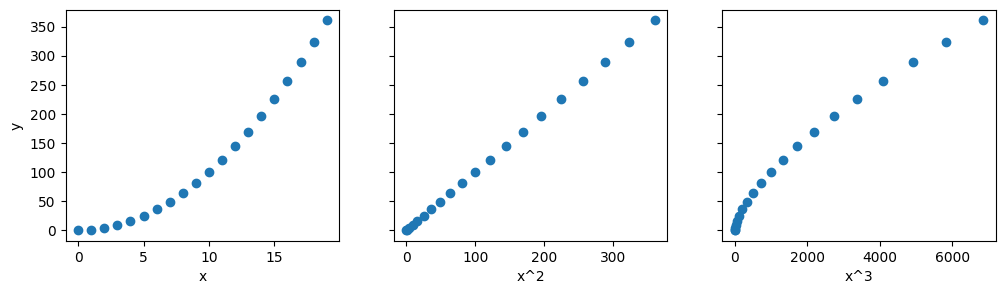

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x[:,i],y)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("y")
plt.show()

In [ ]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]


NameError: name 'zscore_normalize_features' is not defined

In [ ]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value");
plt.xlabel("x");
plt.ylabel("y");
plt.legend();
plt.show()

NameError: name 'zscore_normalize_features' is not defined

In [ ]:
x=np.arange(0,20,1)
y=np.cos(x/2)

x=np.c_[x,x**2,x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()


NameError: name 'zscore_normalize_features' is not defined

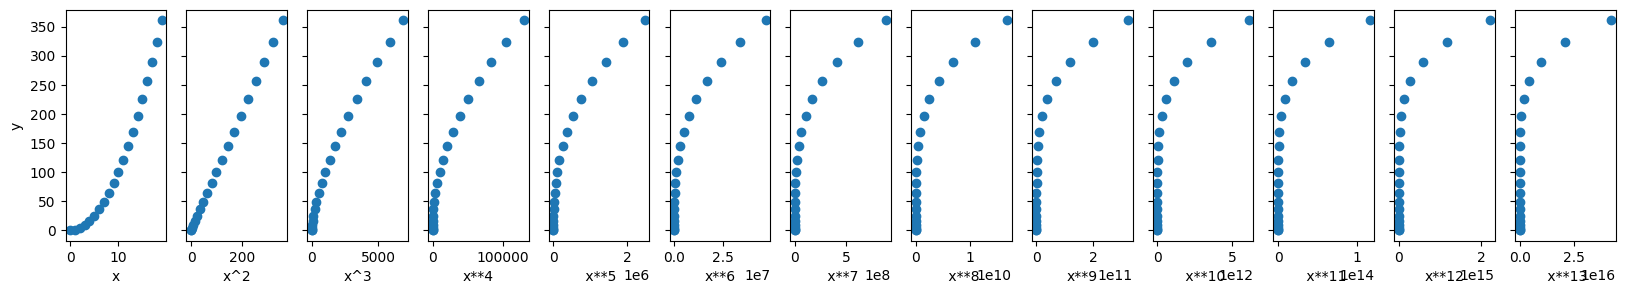

In [ ]:
x=np.arange(0,20,1)
y=x**2
x=np.c_[x,x**2,x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
x_features=['x','x^2','x^3','x**4',' x**5', 'x**6',' x**7',' x**8', 'x**9',' x**10',' x**11', 'x**12',' x**13']


fig,ax=plt.subplots(1,13,figsize=(20,3),sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x[:,i],y)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("y")
plt.show()

# C1_W2_lab05

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# from lab_utils_multi import load_house_data
# from lab_utils_common import dlc
np.set_printoptions(precision=2)


In [ ]:
df = pd.read_csv('/content/houses.txt', delimiter="\t" or ",")


In [ ]:
# Separate features (X_train) and target (y_train)
X_train = df.iloc[:, :-1].values  # All columns except the last one
y_train = df.iloc[:, -1].values   # Only the last column (target variable)

# Feature names
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (99, 0)
y_train shape: (99,)


In [ ]:
print(x_train)
print(y_train)

[[ 952    2    1   65]
 [1244    3    2   64]
 [1947    3    2   17]]
['1.244000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,6.400000000000000000e+01,3.000000000000000000e+02'
 '1.947000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.700000000000000000e+01,5.098000000000000114e+02'
 '1.725000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,4.200000000000000000e+01,3.940000000000000000e+02'
 '1.959000000000000000e+03,3.000000000000000000e+00,2.000000000000000000e+00,1.500000000000000000e+01,5.400000000000000000e+02'
 '1.314000000000000000e+03,2.000000000000000000e+00,1.000000000000000000e+00,1.400000000000000000e+01,4.150000000000000000e+02'
 '8.640000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,6.600000000000000000e+01,2.300000000000000000e+02'
 '1.836000000000000000e+03,3.000000000000000000e+00,1.000000000000000000e+00,1.700000000000000000e+01,5.600000000000000000e+02'
 '1.026000000000000000e+03,3.00000

In [ ]:
scaler=StandardScaler()
x_norm=scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[]
Peak to Peak range by column in Normalized X:[]


In [ ]:
sgdr=SGDRegressor(max_iter=10000)
sgdr.fit(x_norm,y_train)
print(sgdr)
print(f"{sgdr.n_iter_},weight{sgdr.t_}")

ValueError: Found input variables with inconsistent numbers of samples: [3, 99]

In [ ]:
b_norm=sgdr.intercept_
w_norm=sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.27 -37.96], b: 363.16")

model parameters:                   w: None, b:None
model parameters from previous lab: w: [110.56 -21.27 -32.27 -37.96], b: 363.16


In [ ]:
y_pred_sgd=sgd.predict(x_norm)
y_pred=np.dot(x_norm,w_norm)+b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred==y_pred_sgd).all()}")

print(f"prediction on trainnig set:\n {y_pred[:4]}")
print(f"target values \n{y_train[:4]}")

NameError: name 'sgd' is not defined

IndexError: index 0 is out of bounds for axis 1 with size 0

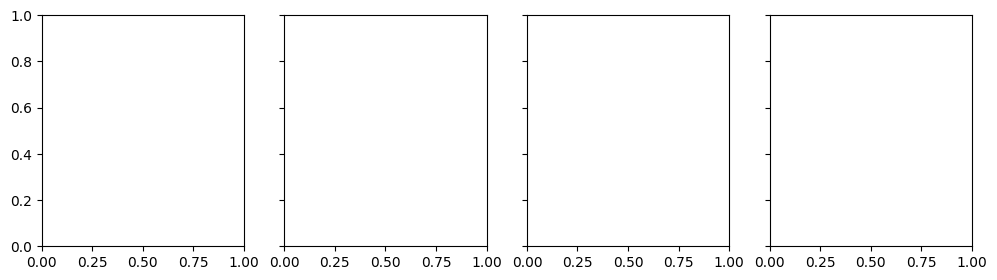

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()